<div style="
            display: inline-block;
            background: linear-gradient(135deg, #A0178A, #EB2C5D);
            font-size: 200%;
            padding: 20px 30px;
            color: white;
            border-radius: 15px;
            border: 3px solid white;
            box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.3);
            text-transform: uppercase;
            font-weight: bold;
            text-align: center;">
    ✨ IMDB Films By Actor For 10K Actors 🌟🎥🎞️🎬
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<h1 style="
    display: inline-block;
    background: linear-gradient(135deg, #FC6840, #F8C93C);
    font-size: 24px;
    padding: 12px 18px;
    color: white;
    border-radius: 8px;
    font-weight: bold;
    text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.2);
    border-left: 5px solid #ffcccb;">
    1 | Data Loading 
</h1>

In [2]:
""" file_path = '/kaggle/input/imdb-films-by-actor-for-10k-actors/actorfilms.csv' """
file_path = './actorfilms.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,Actor,ActorID,Film,Year,Votes,Rating,FilmID
0,Fred Astaire,nm0000001,Ghost Story,1981,7731,6.3,tt0082449
1,Fred Astaire,nm0000001,The Purple Taxi,1977,533,6.6,tt0076851
2,Fred Astaire,nm0000001,The Amazing Dobermans,1976,369,5.3,tt0074130
3,Fred Astaire,nm0000001,The Towering Inferno,1974,39888,7.0,tt0072308
4,Fred Astaire,nm0000001,Midas Run,1969,123,4.8,tt0064664


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191873 entries, 0 to 191872
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Actor    191873 non-null  object 
 1   ActorID  191873 non-null  object 
 2   Film     191873 non-null  object 
 3   Year     191873 non-null  int64  
 4   Votes    191873 non-null  int64  
 5   Rating   191873 non-null  float64
 6   FilmID   191873 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 10.2+ MB


In [5]:
df.describe()

,Year,Votes,Rating
count,191873.000000,1.918730e+05,191873.000000
mean,1997.952948,5.041857e+04,5.975764
std,19.839797,1.392857e+05,1.094434
min,1914.000000,1.000000e+02,1.000000
25%,1990.000000,6.690000e+02,5.400000
50%,2004.000000,3.906000e+03,6.100000
75%,2013.000000,3.213200e+04,6.700000
max,2021.000000,2.371548e+06,9.300000


In [6]:
df.isnull().sum()

Actor      0
ActorID    0
Film       0
Year       0
Votes      0
Rating     0
FilmID     0
dtype: int64

In [7]:
df["Actor"].value_counts()

Actor
Anupam Kher         237
Eric Roberts        221
Danny Trejo         194
Amitabh Bachchan    188
John Carradine      186
                   ... 
Paul Verhoeven        1
Mark Fischbach        1
Gus Kenworthy         1
Freddie Boath         1
Inde Navarrette       1
Name: count, Length: 9615, dtype: int64

In [8]:
df["Film"].value_counts()

Film
Avengers: Endgame                               68
Hamlet                                          64
The Player                                      57
Harry Potter and the Deathly Hallows: Part 1    57
The Three Musketeers                            50
                                                ..
Sex Sells: The Making of 'Touche'                1
Fireman Sam: Set for Action!                     1
Count Your Blessings                             1
Girls About Town                                 1
Dhadak                                           1
Name: count, Length: 41050, dtype: int64

In [9]:
round(df.groupby('Actor')['Rating'].mean().sort_values(ascending=False).iloc[:10],1)

Actor
Ada Nicodemou       8.7
Joe Johnston        8.6
Harry Styles        8.5
John Cazale         8.4
John Mulaney        8.4
Bolaji Badejo       8.4
Darren Aronofsky    8.3
Carrie Henn         8.3
Jessie Mei Li       8.2
Matthew Vaughn      8.2
Name: Rating, dtype: float64

In [10]:
round(df.groupby('Actor')['Votes'].mean().sort_values(ascending=True).iloc[:10],1)

Actor
Tim Loden              109.0
Dylan Conrique         111.0
Sulem Calderon         112.0
George Sear            115.0
Meaghan Oppenheimer    115.0
Vicki Lawrence         122.0
Jane Wymark            124.5
Melissa Barrera        125.0
Jack Wagner            127.0
Annie Murphy           133.0
Name: Votes, dtype: float64

## <div style="color:white;display:fill;border-radius:5px;background-color:#622097;overflow:hidden"><p style="padding:15px;overflow:hidden;font-size:60%;margin:0;"> <b>Actors cast per year</b> </p></div>

Text(0.5, 1.0, 'Actors Cast per Year')

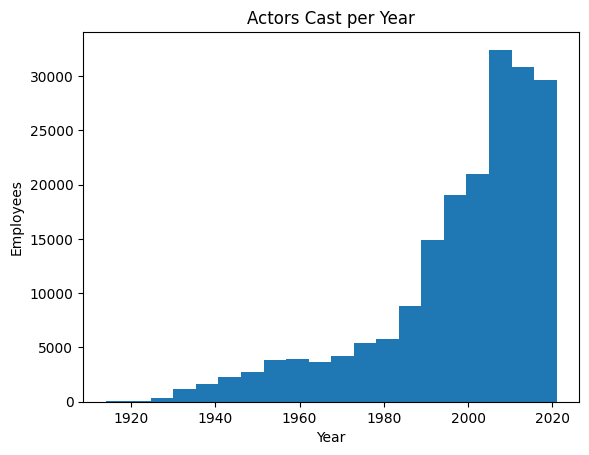

In [14]:
df['Year'].plot(kind='hist', bins=20)
plt.ylabel('Employees')
plt.xlabel('Year')
plt.title('Actors Cast per Year')

## <div style="color:white;display:fill;border-radius:5px;background-color:#622097;overflow:hidden"><p style="padding:15px;overflow:hidden;font-size:60%;margin:0;"> <b>Actor movies by ratings</b> </p></div>

(4.5, 9.0)

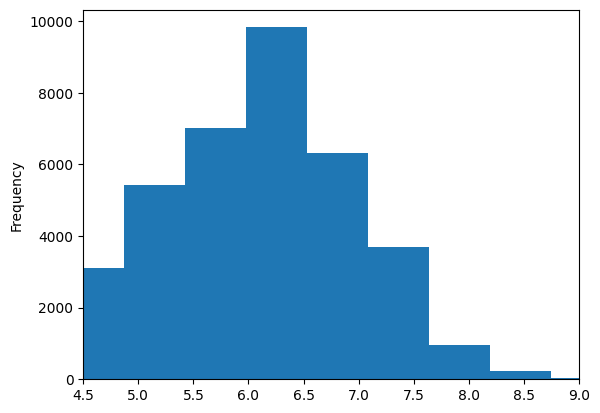

In [ ]:
actor_movies_by_ratings = df[ ['Film', 'Rating'] ].groupby('Film').mean().sort_values('Rating', ascending=False)
actor_movies_by_ratings['Rating'].plot(kind='hist', bins=15)
plt.xlim(xmin=4.5, xmax = 9)

## <div style="color:white;display:fill;border-radius:5px;background-color:#622097;overflow:hidden"><p style="padding:15px;overflow:hidden;font-size:60%;margin:0;"> <b>Actors with the most movies</b> </p></div>

<Axes: xlabel='Actor'>

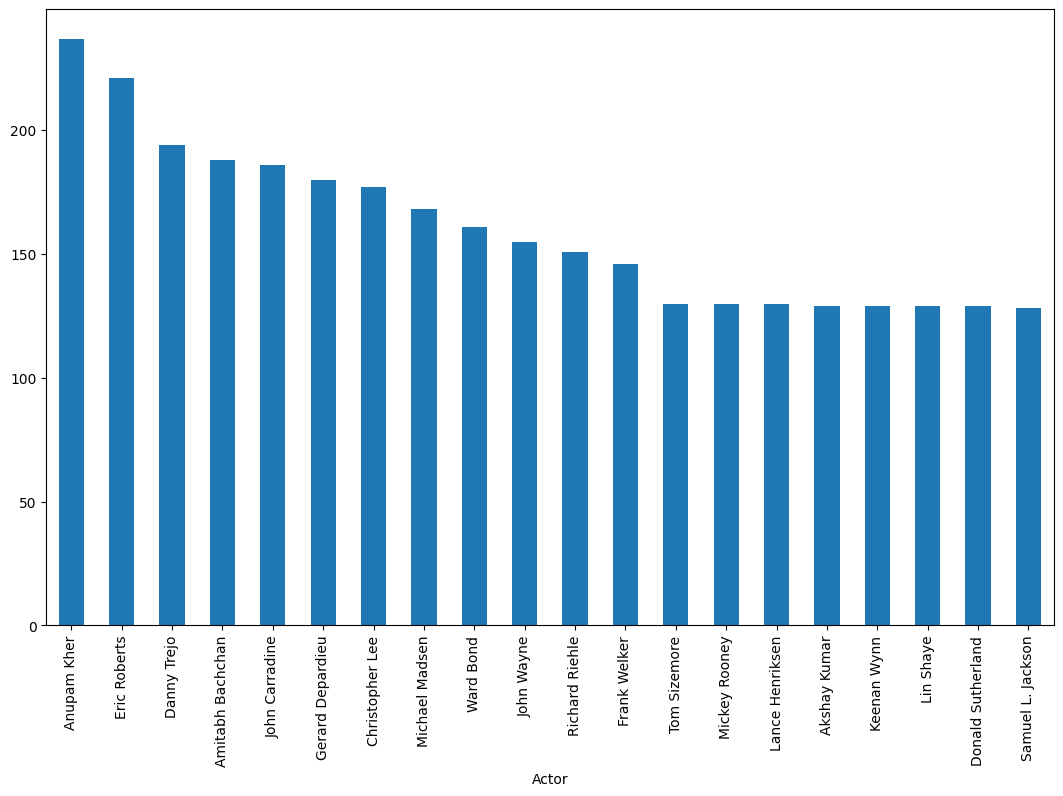

In [16]:
actors_with_most_movies = df['Actor'].value_counts().head(20)
actors_with_most_movies.plot(kind='bar', figsize=(13,8))

In [18]:
num_actores = df["Actor"].nunique()
num_peliculas = df["Film"].nunique()

print(f"🔹 Actores únicos: {num_actores}")
print(f"🔹 Películas únicas: {num_peliculas}")

🔹 Actores únicos: 9615
🔹 Películas únicas: 41050


## <div style="color:white;display:fill;border-radius:5px;background-color:#622097;overflow:hidden"><p style="padding:15px;overflow:hidden;font-size:60%;margin:0;"> <b>Distribution of films per year</b> </p></div>

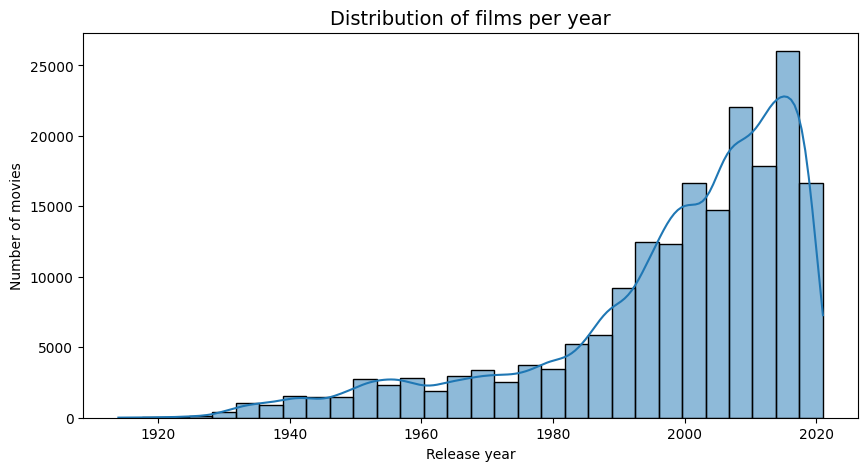

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df["Year"], bins=30, kde=True)
plt.title("Distribution of films per year", fontsize=14)
plt.xlabel("Release year")
plt.ylabel("Number of movies")
plt.show()

## <div style="color:white;display:fill;border-radius:5px;background-color:#622097;overflow:hidden"><p style="padding:15px;overflow:hidden;font-size:60%;margin:0;"> <b>Year with the most movies</b> </p></div>

In [23]:
rango_anios = (df["Year"].min(), df["Year"].max())
anio_mas_peliculas = df["Year"].value_counts().idxmax()

print(f"📅 Years range: {rango_anios}")
print(f"🏆 Year with the most movies: {anio_mas_peliculas}")

📅 Years range: (1914, 2021)
🏆 Year with the most movies: 2014


## <div style="color:white;display:fill;border-radius:5px;background-color:#622097;overflow:hidden"><p style="padding:15px;overflow:hidden;font-size:60%;margin:0;"> <b>Top 10 highest rated films</b> </p></div>

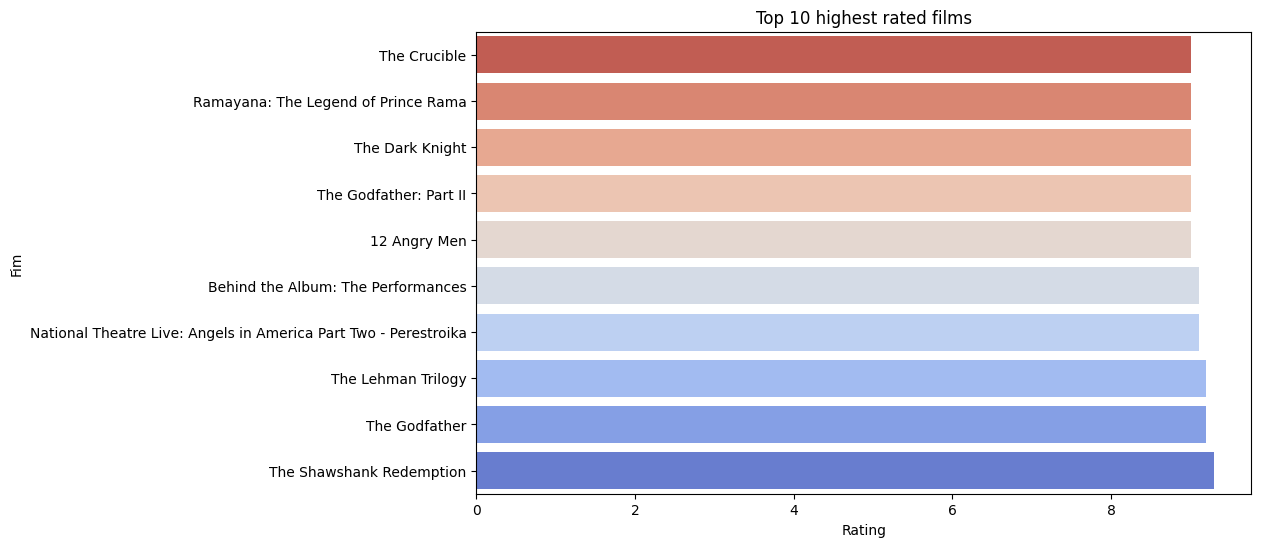

In [27]:
top_ratings = df.nlargest(100, "Rating")[["Film", "Rating"]]

plt.figure(figsize=(10,6))
sns.barplot(data=top_ratings, y="Film", x="Rating", palette="coolwarm")
plt.xlabel("Rating")
plt.ylabel("Fim")
plt.title("Top 10 highest rated films")
plt.gca().invert_yaxis()
plt.show()

## <div style="color:white;display:fill;border-radius:5px;background-color:#622097;overflow:hidden"><p style="padding:15px;overflow:hidden;font-size:60%;margin:0;"> <b>Relation between votes and rating</b> </p></div>

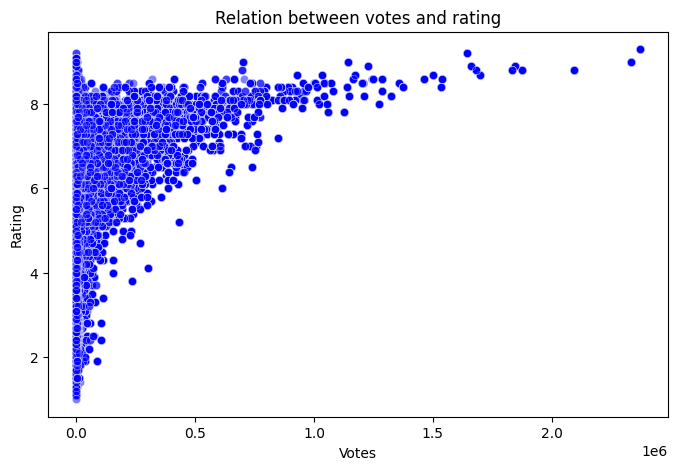

In [34]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Votes"], y=df["Rating"], alpha=0.5, color="blue")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.title("Relation between votes and rating")
plt.show()

## <div style="color:white;display:fill;border-radius:5px;background-color:#622097;overflow:hidden"><p style="padding:15px;overflow:hidden;font-size:60%;margin:0;"> <b>Rating distribution</b> </p></div>

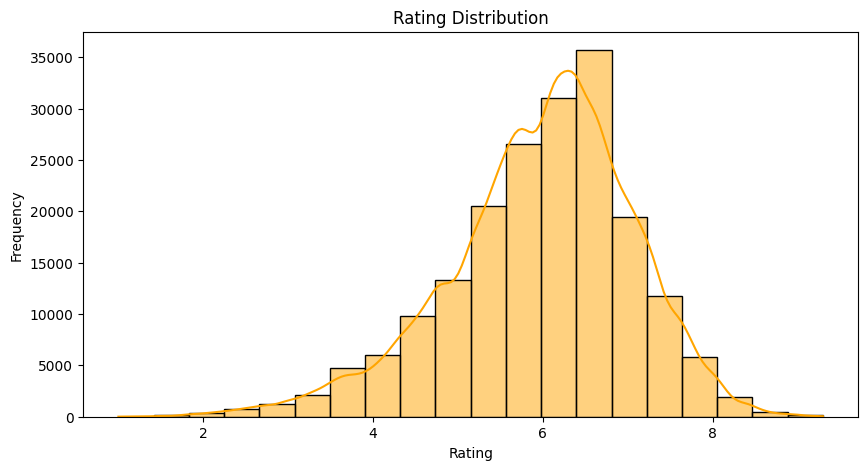

In [33]:
plt.figure(figsize=(10,5))
sns.histplot(df["Rating"], bins=20, kde=True, color="orange")
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

## <div style="color:white;display:fill;border-radius:5px;background-color:#622097;overflow:hidden"><p style="padding:15px;overflow:hidden;font-size:60%;margin:0;"> <b>Top 10 actors with the most films</b> </p></div>

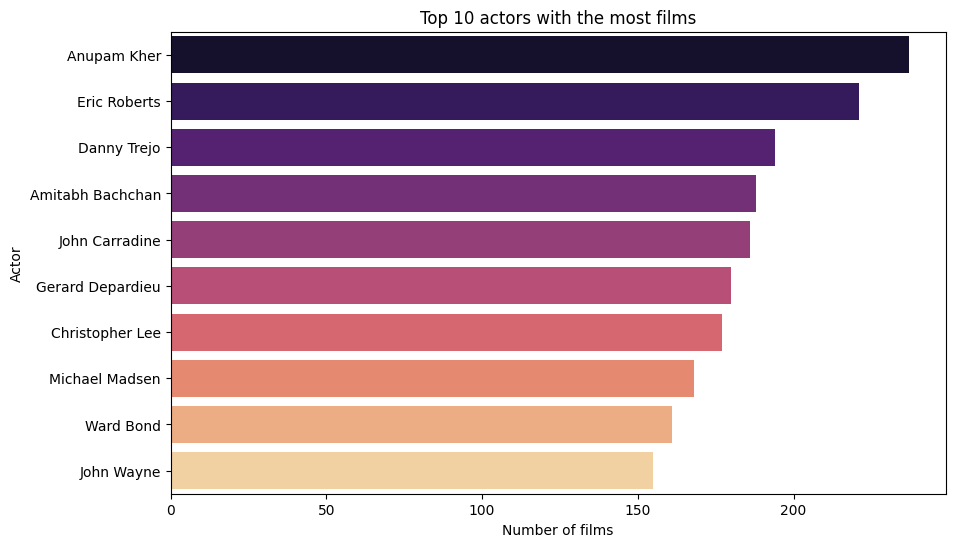

In [36]:
top_actores = df["Actor"].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=top_actores.index, x=top_actores.values, palette="magma")
plt.xlabel("Number of films")
plt.ylabel("Actor")
plt.title("Top 10 actors with the most films")
plt.show()

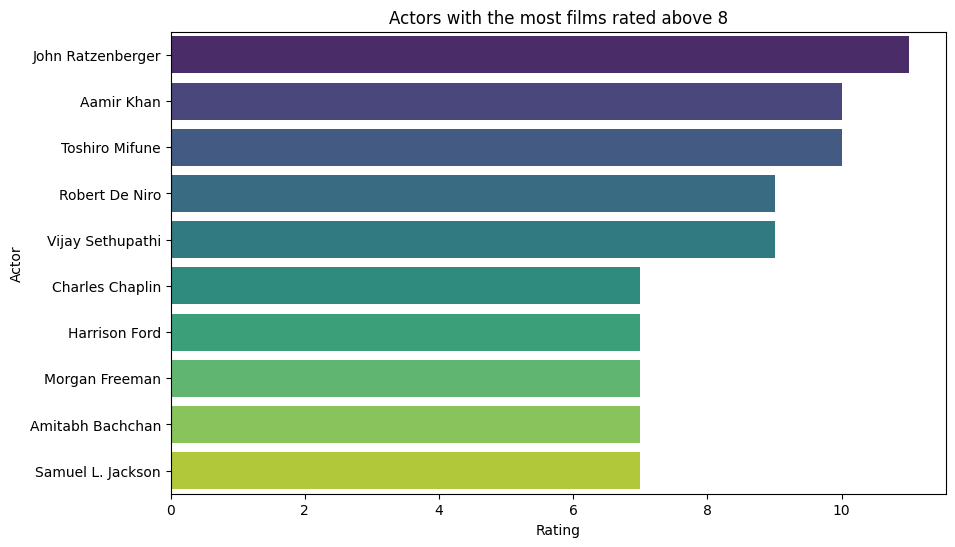

In [40]:
actores_rating8 = df[df["Rating"] > 8]["Actor"].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=actores_rating8.index, x=actores_rating8.values, palette="viridis")
plt.xlabel("Rating")
plt.ylabel("Actor")
plt.title("Actors with the most films rated above 8")
plt.show()

## <div style="color:white;display:fill;border-radius:5px;background-color:#622097;overflow:hidden"><p style="padding:15px;overflow:hidden;font-size:60%;margin:0;"> <b>Top 10 actors with the highest average rating </b> </p></div>

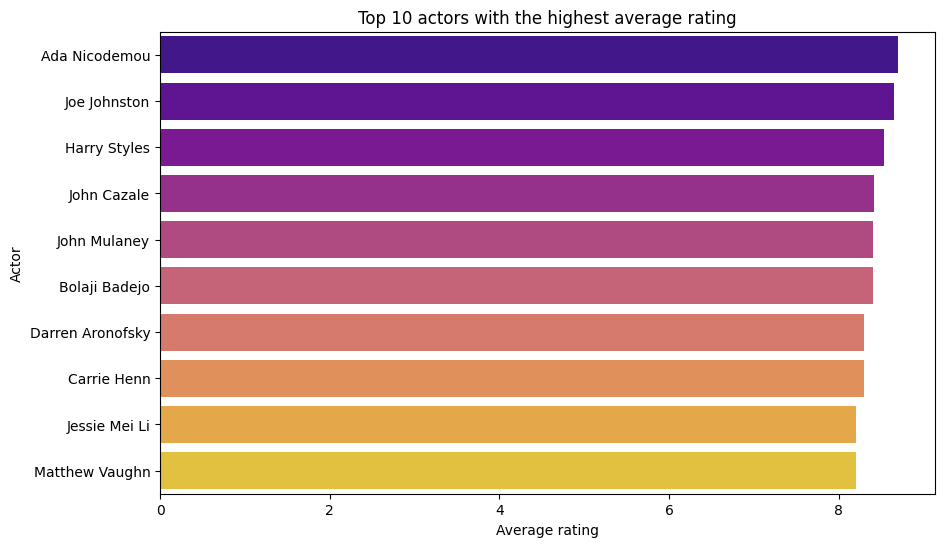

In [42]:
actor_avg_rating = df.groupby("Actor")["Rating"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=actor_avg_rating.index, x=actor_avg_rating.values, palette="plasma")
plt.xlabel("Average rating")
plt.ylabel("Actor")
plt.title("Top 10 actors with the highest average rating")
plt.show()

## <div style="color:white;display:fill;border-radius:5px;background-color:#622097;overflow:hidden"><p style="padding:15px;overflow:hidden;font-size:60%;margin:0;"> <b>Evolution of movie ratings over time</b> </p></div>

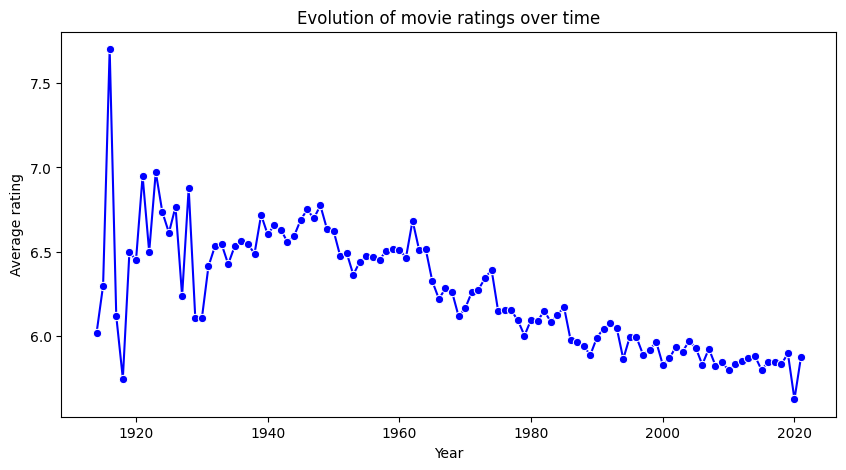

In [45]:
yearly_rating = df.groupby("Year")["Rating"].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_rating.index, y=yearly_rating.values, marker="o", color="blue")
plt.xlabel("Year")
plt.ylabel("Average rating")
plt.title("Evolution of movie ratings over time")
plt.show()

## <div style="color:white;display:fill;border-radius:5px;background-color:#622097;overflow:hidden"><p style="padding:15px;overflow:hidden;font-size:60%;margin:0;"> <b>Average rating per decade</b> </p></div>

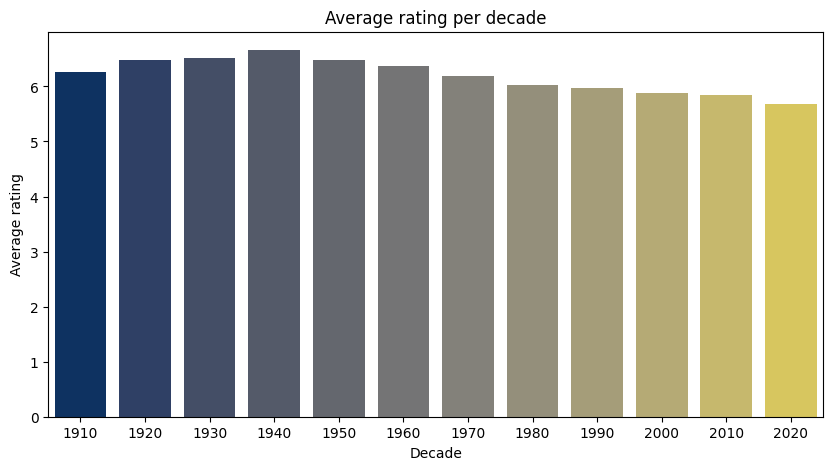

In [47]:
df["Decade"] = (df["Year"] // 10) * 10  # Group by decade 
decade_rating = df.groupby("Decade")["Rating"].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=decade_rating.index.astype(str), y=decade_rating.values, palette="cividis")
plt.xlabel("Decade")
plt.ylabel("Average rating")
plt.title("Average rating per decade")
plt.show()